In [1]:
import numpy as np
import os
import cv2
import random
import math

import matplotlib.pyplot as plt
from PIL import Image

import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np
import scipy.signal as signal

char_to_index = {"深":0, "秦":1, "京":2, "海":3, "成":4, "南":5, "杭":6, "苏":7, "松":8}

In [2]:
label_file = "./data/train-data-label.txt"
image_file = "./data/train-data"
data_list = []
with open(label_file, 'r') as file_to_read:
    while True:
        lines = file_to_read.readline().strip() # 整行读取数据
        if not lines:
            break
        lines = lines.split(",  ")
        image_path = os.path.join(image_file, lines[1])
        label = [];
        label.append(char_to_index[lines[0][0]])
        for i in range(1, len(lines[0])):
            if '0' <= lines[0][i] and lines[0][i] <= '9':
                label.append(9 + ord(lines[0][i]) - ord('0'))
            else:
                label.append(9 + 10 + ord(lines[0][i]) - ord('A'))
        data_list.append({"image_path": image_path, "label":label})

{'image_path': './data/train-data/51dafae49990e44b.jpg', 'label': [4, 40, 11, 39, 23, 30, 12, 18, 20]}
(70, 356, 3)


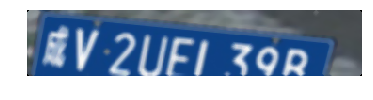

In [11]:
data_index = 3001#713
print(data_list[data_index])
img = Image.open(data_list[data_index]["image_path"])
img = np.array(img)
for i in range(len(img[0,0])):
    img[:,:,i] = signal.medfilt2d(img[:,:,i], kernel_size=5)
print(img.shape)
h, w, _ = img.shape
plt.figure("love")
plt.imshow(img, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

/home/lbyg/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


max_count =  7771.0


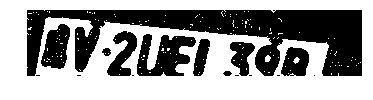

In [12]:
diff_threshold = 80
search_step = 10
def diff(val_x, val_y):
    diff_sum = 0
    for i in range(len(val_x)):
        diff_sum += (val_x[i] - val_y[i]) * (val_x[i] - val_y[i])
    return diff_sum

count = np.zeros((256, 256, 256))
for i in range(h):
    for j in range(w):
        count[img[i, j, 0], img[i, j, 1], img[i, j, 2]] += 1
max_count = 0
max_color = np.array([0, 0, 0])
for i in range(0, h, h // search_step):
    for j in range(0, w, w // search_step):
        sum_count = 0
        sum_diff = 0
        for r in range(max(img[i, j, 0] - 10, 0), min(img[i, j, 0] + 10, 256)):
            r_diff = (r - img[i, j, 0]) * (r - img[i, j, 0])
            if r_diff < diff_threshold:
                for g in range(max(img[i, j, 1] - 10, 0), min(img[i, j, 1] + 10, 256)):
                    g_diff = (g - img[i, j, 1]) * (g - img[i, j, 1])
                    if r_diff + g_diff < diff_threshold:
                        for b in range(max(img[i, j, 2] - 10, 0), min(img[i, j, 2] + 10, 256)):
                            b_diff = (b - img[i, j, 2]) * (b - img[i, j, 2])
                            if r_diff + g_diff + b_diff < diff_threshold:
                                sum_count += count[r, g, b]
        if sum_count > max_count:
            max_count = sum_count
            max_color = img[i, j]
flag = np.zeros((h, w))
for i in range(h):
    for j in range(w):
        if diff(img[i, j], max_color) < diff_threshold:
            flag[i, j] = 255
print("max_count = ", max_count)
plt.figure("love")
plt.imshow(flag, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
            

In [13]:
def add_point_to_img(img_with_point, x_add_y_min, point_width):
    _, i, j = x_add_y_min
    print(x_add_y_min)
    for x in range(i - point_width, i + point_width + 1):
        for y in range(j - point_width, j + point_width + 1):
            img_with_point[x, y] = [255, 0, 0]

[32, 10, 22]
[378, 67, 311]
[-279, 37, 316]
[54, 66, 12]


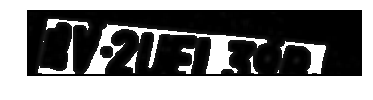

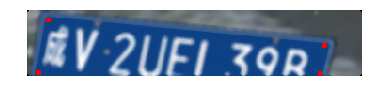

In [15]:
point_width = 2
img_with_point = img.copy()
flag_count = np.zeros((h, w))
for i in range(point_width, h - point_width):
    for j in range(point_width, w - point_width):
        for x in range(i - point_width, i + point_width + 1):
            for y in range(j - point_width, j + point_width + 1):
                if flag[x, y] == 255:
                    flag_count[i, j] += 1
        if flag_count[i, j] > (1 + point_width * 2) * (1 + point_width * 2) - 1:
            flag_count[i, j] = 255
            
x_add_y_min = [1e6, 0, 0]
x_add_y_max = [-1e6, 0, 0]
x_sub_y_min = [1e6, 0, 0]
x_sub_y_max = [-1e6, 0, 0]
for x in range(h):
    for y in range(w):
        if flag_count[x, y] == 255:
            x_add_y = x + y
            x_sub_y = x - y
            if x_add_y < x_add_y_min[0]:
                x_add_y_min = [x_add_y, x, y]
            if x_add_y > x_add_y_max[0]:
                x_add_y_max = [x_add_y, x, y]
            if x_sub_y < x_sub_y_min[0]:
                x_sub_y_min = [x_sub_y, x, y]
            if x_sub_y > x_sub_y_max[0]:
                x_sub_y_max = [x_sub_y, x, y]

add_point_to_img(img_with_point, x_add_y_min, point_width)
add_point_to_img(img_with_point, x_add_y_max, point_width)
add_point_to_img(img_with_point, x_sub_y_min, point_width)
add_point_to_img(img_with_point, x_sub_y_max, point_width)

plt.figure("love")
plt.imshow(flag_count, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.figure("love")
plt.imshow(img_with_point, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

In [7]:
def reverse_write_and_black(flag):
    res = np.array(flag)
    h, w = res.shape
    for i in range(h):
        for j in range(w):
            if res[i,j] == 255:
                res[i,j] = 0
            else:
                res[i,j] = 255
    return res

In [8]:
def get_pts(end_point, box_point):
    res_index = []
    left_diff = diff(end_point[0], end_point[1])
    right_diff = diff(end_point[2], end_point[3])
    if left_diff > right_diff:
        res_index.extend([0, 1])
        if end_point[2, 1] - box_point[2, 1] > box_point[3, 1] - end_point[3, 1]:
            res_index.extend([2])
        else:
            res_index.extend([3])
    else:
        res_index.extend([2, 3])
        if end_point[0, 1] - box_point[0, 1] > box_point[1, 1] - end_point[1, 1]:
            res_index.extend([0])
        else:
            res_index.extend([1])
    return np.float32(end_point[res_index]), np.float32(box_point[res_index])

[[ 22.  10.]
 [ 12.  66.]
 [316.  37.]]
[[  0.   0.]
 [  0.  69.]
 [355.   0.]]


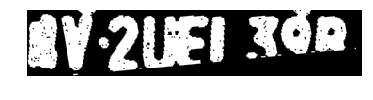

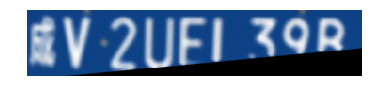

In [9]:
# 左上，左下，右上，右下
end_point = np.array([[x_add_y_min[2], x_add_y_min[1]], [x_sub_y_max[2], x_sub_y_max[1]], [x_sub_y_min[2], x_sub_y_min[1]], [x_add_y_max[2], x_add_y_max[1]]])
box_point = np.array([[0, 0], [0, h - 1], [w - 1, 0], [w - 1, h - 1]])

pts1, pts2 = get_pts(end_point, box_point)
print(pts1)
print(pts2)
#pts1 = np.float32([[x_add_y_min[2], x_add_y_min[1]], [x_sub_y_min[2], x_sub_y_min[1]], [x_sub_y_max[2], x_sub_y_max[1]]])
#pts2 = np.float32([[0, 0], [w - 1, 0], [0, h - 1]])
#print(pts1)
#print(pts2)
 
M = cv2.getAffineTransform(pts1, pts2)
flag_dst = cv2.warpAffine(reverse_write_and_black(flag), M, (w, h))
img_dst = cv2.warpAffine(img, M, (w, h))
plt.figure("love")
plt.imshow(flag_dst, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()
plt.figure("love")
plt.imshow(img_dst, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

[0, 2, 12, 38, 40, 35, 37, 41, 40, 40, 41, 38, 41, 41, 44, 42, 46, 47, 46, 47, 48, 50, 53, 48, 46, 42, 47, 50, 47, 36, 24, 4, 0, 0, 0, 0, 0, 3, 7, 11, 15, 22, 31, 36, 44, 48, 52, 54, 51, 51, 46, 43, 42, 43, 41, 40, 43, 47, 49, 52, 44, 40, 39, 33, 26, 23, 20, 12, 6, 1, 1, 1, 0, 0, 0, 0, 1, 5, 5, 6, 6, 8, 10, 7, 4, 2, 1, 4, 14, 20, 23, 27, 32, 33, 35, 34, 38, 37, 37, 41, 42, 43, 34, 35, 40, 40, 42, 44, 42, 41, 39, 37, 35, 32, 27, 20, 17, 4, 0, 0, 0, 0, 0, 1, 31, 47, 46, 41, 43, 45, 45, 50, 50, 51, 38, 11, 7, 7, 6, 5, 3, 4, 5, 8, 8, 10, 18, 43, 47, 44, 42, 45, 44, 43, 44, 46, 43, 33, 33, 35, 37, 43, 44, 46, 51, 48, 48, 51, 50, 46, 45, 36, 31, 29, 27, 25, 25, 25, 25, 22, 22, 22, 22, 23, 19, 18, 17, 14, 8, 9, 5, 2, 0, 0, 0, 3, 23, 36, 43, 45, 46, 46, 43, 42, 42, 44, 41, 35, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 6, 10, 11, 13, 14, 17, 17, 15, 20, 21, 24, 27, 28, 30, 29, 26, 21, 18, 30, 39, 38, 40, 42, 41, 36, 30, 26, 25, 17, 7, 3, 0, 0, 0, 1, 10

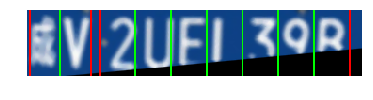

In [20]:
thickness = 2
flag_dst_threshold = 10
def draw_a_line(img_dst_segment, pos, thickness, color = [0, 255, 0]):
    h, w, _ = img_dst_segment.shape
    for x in range(h):
        for y in range(pos, min(pos + thickness, w)):
            img_dst_segment[x, y, :] = np.array(color)

img_dst_segment = img_dst.copy()
flag_dst_count = [0] * w
for x in range(h):
    for y in range(w):
        if flag_dst[x, y] == 255:
            flag_dst_count[y] += 1
print(flag_dst_count)
point_pos = w * 2 // 9

l, r = 0, point_pos
while l < w - 1 and flag_dst_count[l] < flag_dst_threshold:
    l += 1
while r > 0 and  flag_dst_count[r] < flag_dst_threshold:
    r -= 1
draw_a_line(img_dst_segment, l, thickness, [255, 0, 0])
draw_a_line(img_dst_segment, r, thickness, [255, 0, 0])
draw_a_line(img_dst_segment, (l+r) // 2, thickness)

l, r = point_pos, w - 1
while l < w - 1 and flag_dst_count[l] < flag_dst_threshold:
    l += 1
while r > 0 and  flag_dst_count[r] < flag_dst_threshold:
    r -= 1
count = 0
for i in range(l, r + 1):
    if flag_dst_count[i] < flag_dst_threshold:
        count += 1
count //= 12
print(count)
l = max(0, l - count)
r = min(w - 1, r + count)
draw_a_line(img_dst_segment, l, thickness, [255, 0, 0])
draw_a_line(img_dst_segment, r, thickness, [255, 0, 0])
for i in range(1, 7):
    pos = l + (r - l) * i // 7
    draw_a_line(img_dst_segment, pos, thickness)

plt.figure("love")
plt.imshow(img_dst_segment, cmap='gray') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()